In [2]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
import sounddevice as sd
import soundfile as sf

In [3]:
def create_sin_waves(amplitudes, frequencies, phases, t):
    """
    Create sin waves
    :param amplitudes: amplitudes list
    :param frequencies: frequencies list
    :param phases: phases list
    :param t: time list
    :return: sin waves list of lists
    """
    sinusoids = [amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(4)]
    return sinusoids


### 1. Create a synthetic signal as a sum of sinusoids (1 point)

#### a) create sinusoids with chosen amplitudes and phases

In [4]:
# Define parameters
fs = 8000  # Sampling frequency
t = np.linspace(0, 3, 3 * fs, endpoint=False)  # Time vector for 3 seconds

# Define frequencies, amplitudes, and phases
frequencies = [100, 500, 1500, 2500]
amplitudes = [1, 0.5, 0.3, 0.2]
phases = [0, np.pi/4, np.pi/2, np.pi]

#create the sinusoids from the previous function
sinusoids_list = create_sin_waves(amplitudes, frequencies, phases, t)


#### b.1) Play sinusoids

In [5]:
# Play sinusoids
for sinusoid_ in sinusoids_list:
    sd.play(sinusoid_, fs)
    sd.wait()

#### b.2) Plot sinusoids (only first 200 samples are displayed for better visualization)

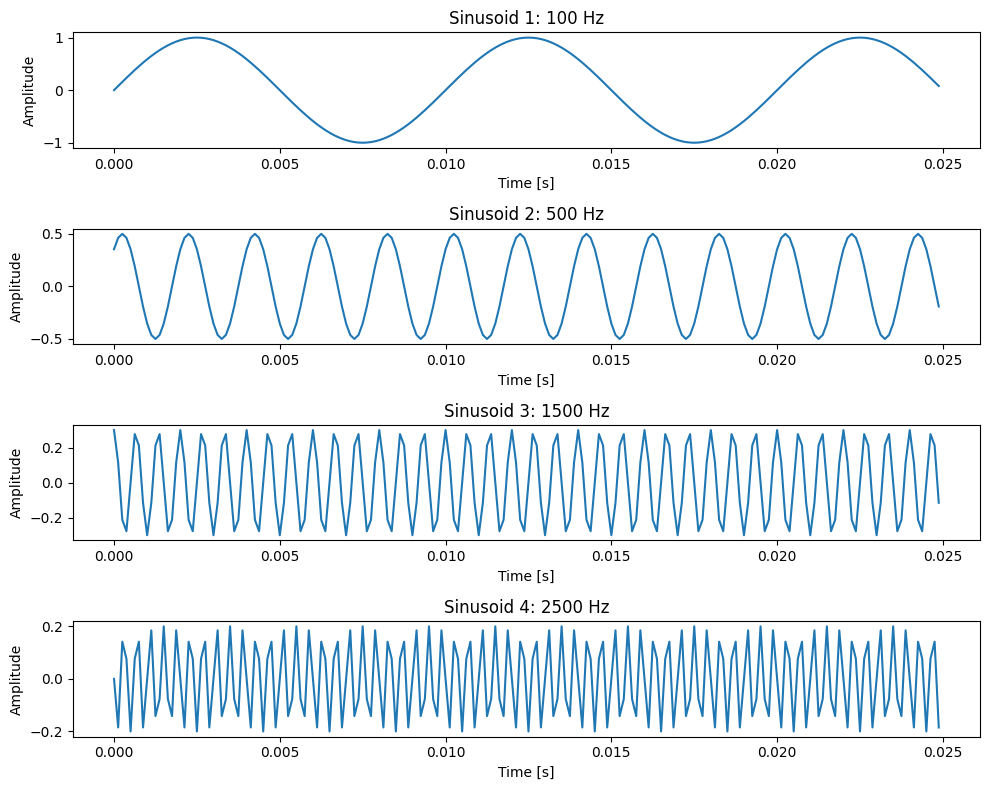

In [6]:
# Plot sinusoids
plt.figure(figsize=(10, 8))
for i, sinusoid_ in enumerate(sinusoids_list):
    plt.subplot(4, 1, i+1)
    plt.plot(t[:200], sinusoid_[:200])
    plt.title(f'Sinusoid {i+1}: {frequencies[i]} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

#### c) Add them up to x(t). Plot and play x(t) (ONLY FIRST 200 SAMPLES ARE SHOWN IN THE PLOT). Write the signal to a wav file.

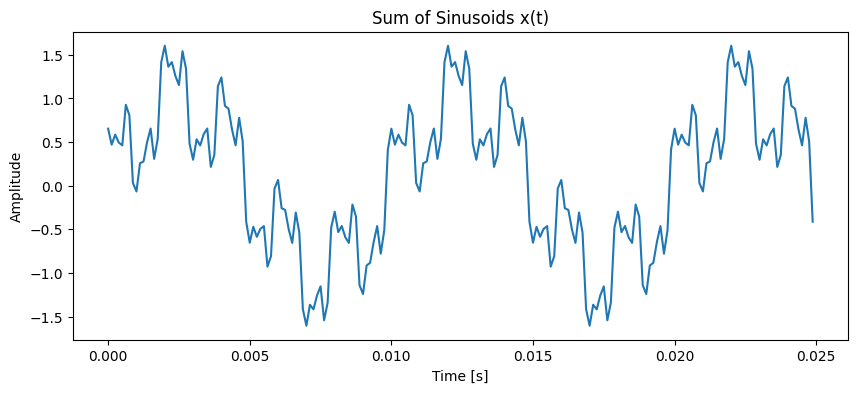

In [7]:
# Sum the sinusoids to create x(t)
x_t = sum(sinusoids_list)

# Plot x(t)
plt.figure(figsize=(10, 4))
plt.plot(t[:200], x_t[:200])
plt.title('Sum of Sinusoids x(t)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Play x(t)
sd.play(x_t, fs)
sd.wait()

# Write x(t) to a WAV file
sf.write('synthetic_signal.wav', x_t, fs)

#### d) Apply DFT with nfft= 512

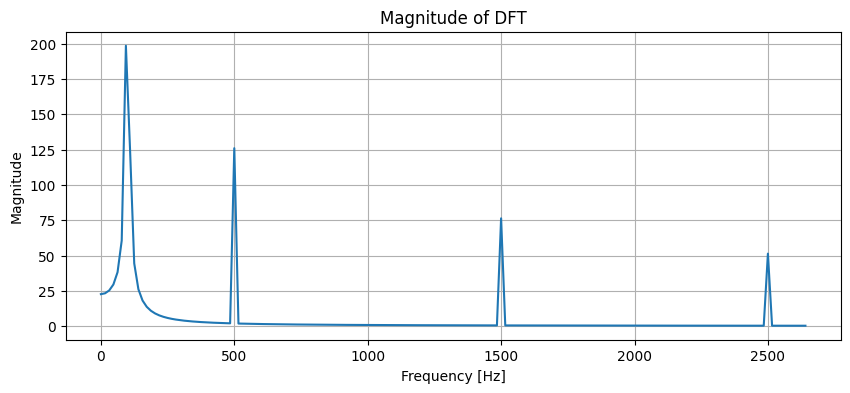

In [8]:
# Define the number of DFT points
nfft = 512

# Apply DFT using scipy.fftpack.fft
X1_f = fft(x_t, nfft)

# Compute the magnitude of the DFT
magnitude = np.abs(X1_f)

# Frequency vector for plotting
freqs = np.fft.fftfreq(nfft, 1/fs)

# Plot the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freqs[:nfft//3], magnitude[:nfft//3])  # Plot only the positive frequencies
plt.title('Magnitude of DFT')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

#### d.1) Apply DFT with nfft= 258

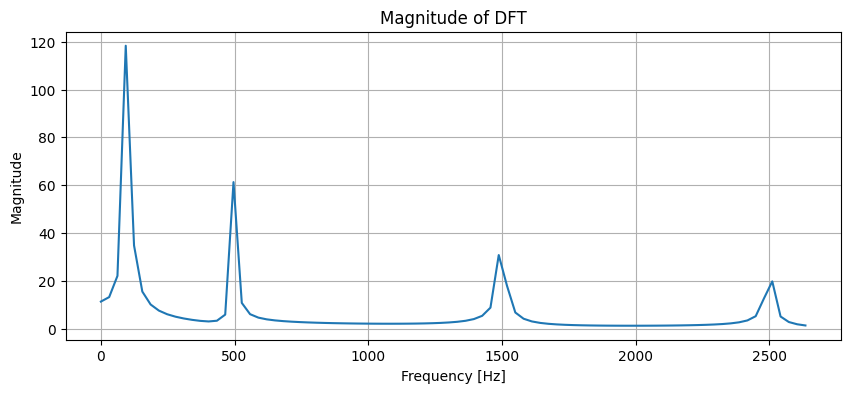

In [9]:
# Define the number of DFT points
nfft = 258

# Apply DFT using scipy.fftpack.fft
X2_f = fft(x_t, nfft)

# Compute the magnitude of the DFT
magnitude = np.abs(X2_f)

# Frequency vector for plotting
freqs = np.fft.fftfreq(nfft, 1/fs)

# Plot the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freqs[:nfft//3], magnitude[:nfft//3])  # Plot only the positive frequencies
plt.title('Magnitude of DFT')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

#### d.2) Apply DFT with nfft= signal length

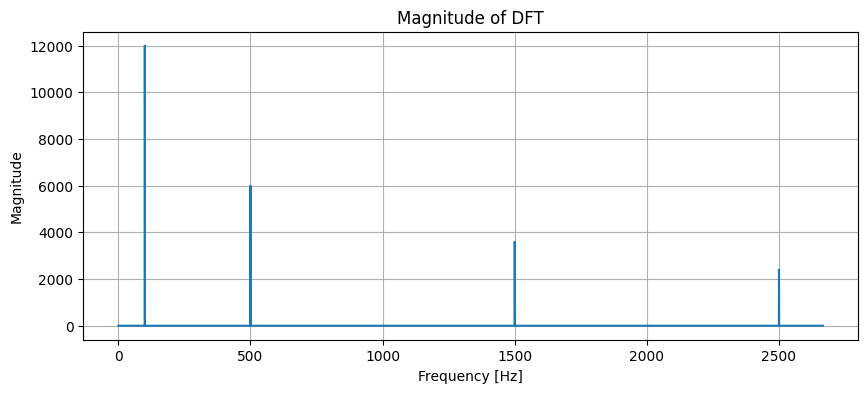

In [10]:
# Define the number of DFT points
nfft = len(x_t)

# Apply DFT using scipy.fftpack.fft
X_f = fft(x_t, nfft)

# Compute the magnitude of the DFT
magnitude = np.abs(X_f)

# Frequency vector for plotting
freqs = np.fft.fftfreq(nfft, 1/fs)

# Plot the magnitude of the DFT
plt.figure(figsize=(10, 4))
plt.plot(freqs[:nfft//3], magnitude[:nfft//3])  # Plot only the positive frequencies
plt.title('Magnitude of DFT')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

#### e) Observe the components and relationship between nfft and frequency in Hz. Report your observation

As de nfft approaches the number of samples in the signal, the resolution of the plot for DFT increases.
Although, the DFT plot with nnft = 512 have enough resolution to be readable; then it could be said that a nfft = 2% signal length, is enough to produce an accurate DFT plot.

Finally, considering the frequencies in the DFT plots, they confirm the pressence of 100, 500, 1500 and 2500 Hz frequencies in the X_f wave, which is the sum of the previous sinus waves.

### 2. Read an audio and observe the spectrum. (1 point)

#### a) Read 'audio1.wav' 

In [11]:
# Read and play audio 1
filename = 'audio1.wav'
audio_data_1, fs_1 = sf.read(filename)


#### a.1) Play

In [12]:
# Play audio 1
sd.play(audio_data_1, fs_1)
sd.wait()

#### a.2) Plot

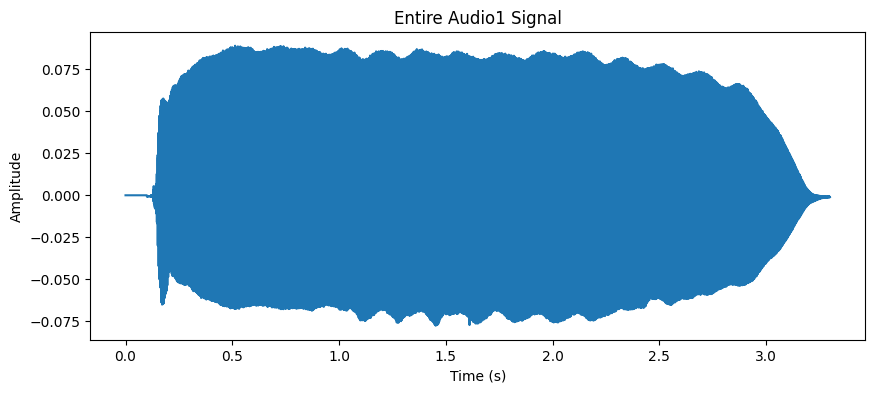

In [18]:
# plot audio 1
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(audio_data_1) / fs_1, len(audio_data_1)), audio_data_1)
plt.title('Entire Audio1 Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### a.3) Read 'audio2.wav' 

In [14]:
# Read and play audio 2
filename = 'audio2.wav'
audio_data_2, fs_2 = sf.read(filename)

#### a.4) Play

In [15]:
# Play audio 2
sd.play(audio_data_2, fs_2)
sd.wait()

#### a.5) Plot

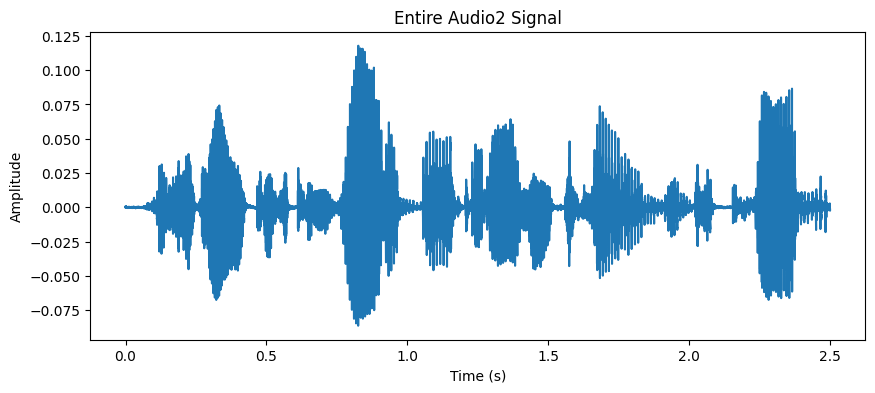

In [17]:
# plot audio 2
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, len(audio_data_2) / fs_2, len(audio_data_2)), audio_data_2)
plt.title('Entire Audio2 Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### B.1) Plot signal 1 between 0.5 and 1s

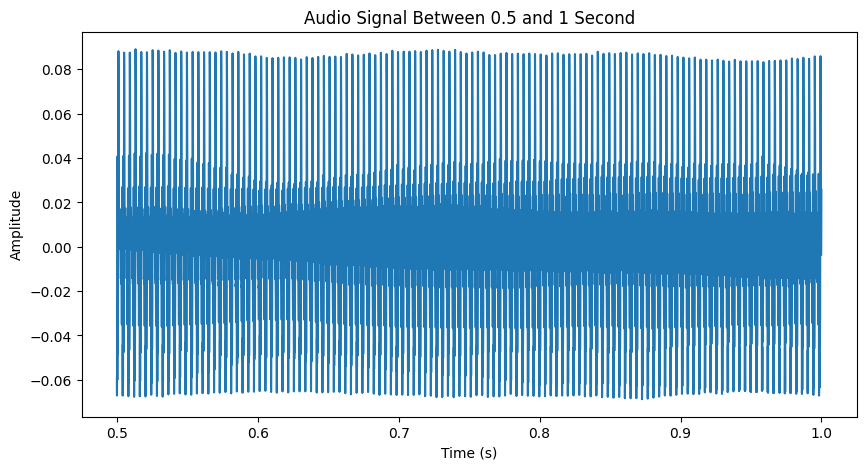

In [19]:
# Plot signal 1 between 0.5 and 1 second
start_time = 0.5
end_time = 1.0

start_sample_1 = int(start_time * fs_1)
end_sample_1 = int(end_time * fs_1)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(start_time, end_time, end_sample_1 - start_sample_1), audio_data_1[start_sample_1:end_sample_1])
plt.title('Audio Signal Between 0.5 and 1 Second')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### B.2) Plot signal 2 between 0.5 and 1s

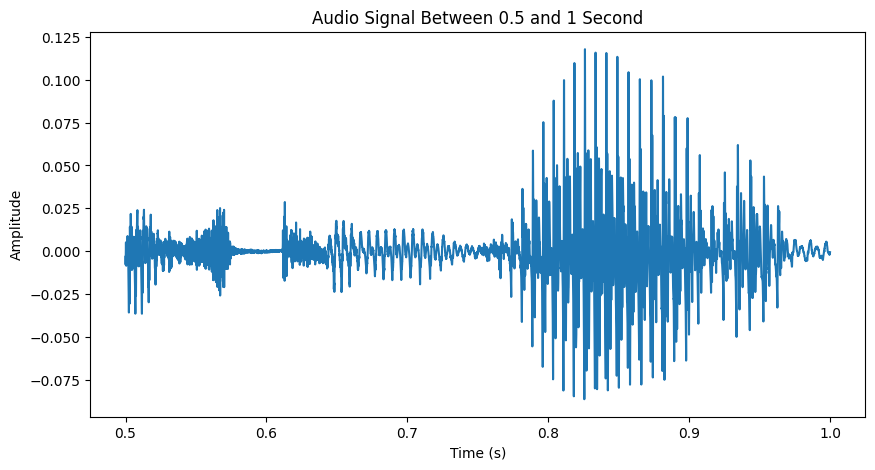

In [20]:
start_sample_2 = int(start_time * fs_2)
end_sample_2 = int(end_time * fs_2)

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(start_time, end_time, end_sample_2 - start_sample_2), audio_data_2[start_sample_2:end_sample_2])
plt.title('Audio Signal Between 0.5 and 1 Second')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### c,d) Compute DFT in a loop for 'audio1.wav' 

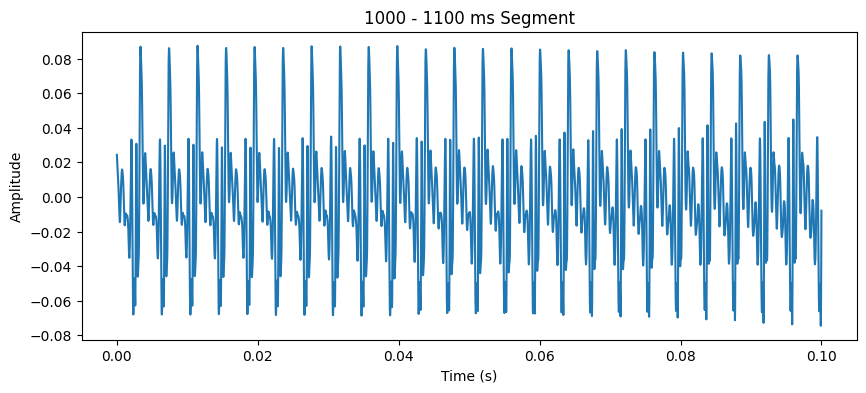

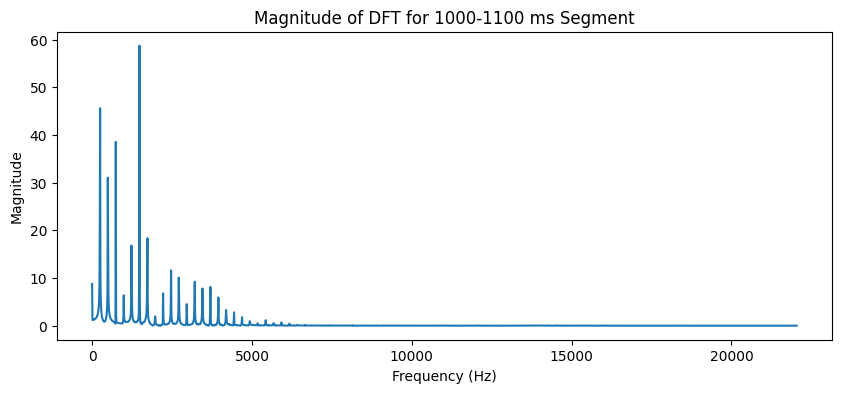

In [21]:

# Function to process segments
def process_segments(audio_data, fs, segment_timelength_ms):
    """
    Process segments of audio data and perform DFT
    Plot only a chosen segment of data "i"
    :param audio_data: audio data
    :param fs: sampling frequency
    :param segment_timelength_ms: segment time length in milliseconds
    :return: None
    """
    
    segment_length_samples = int(segment_timelength_ms * fs / 1000)
    num_segments = len(audio_data) // segment_length_samples
    
    for i in range(num_segments):
        segment = audio_data[i * segment_length_samples:(i + 1) * segment_length_samples]
        
        # Plot the segment
        if i == 10:
            plt.figure(figsize=(10, 4))
            plt.plot(np.linspace(0, segment_timelength_ms / 1000, segment_length_samples), segment)
            plt.title('1000 - 1100 ms Segment')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.show()
        
        # Apply DFT and plot magnitude
        X_f = fft(segment)
        frequencies = np.fft.fftfreq(len(segment), 1 / fs)
        magnitude = np.abs(X_f)
        
        #Plot DFT
        if i == 10:
            plt.figure(figsize=(10, 4))
            plt.plot(frequencies[:len(segment) // 2], magnitude[:len(segment) // 2])
            plt.title('Magnitude of DFT for 1000-1100 ms Segment')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Magnitude')
            plt.show()

# Process segments of 100 ms
process_segments(audio_data_1, fs_1, 100)


#### c,d) Compute DFT in a loop for 'audio2.wav' 

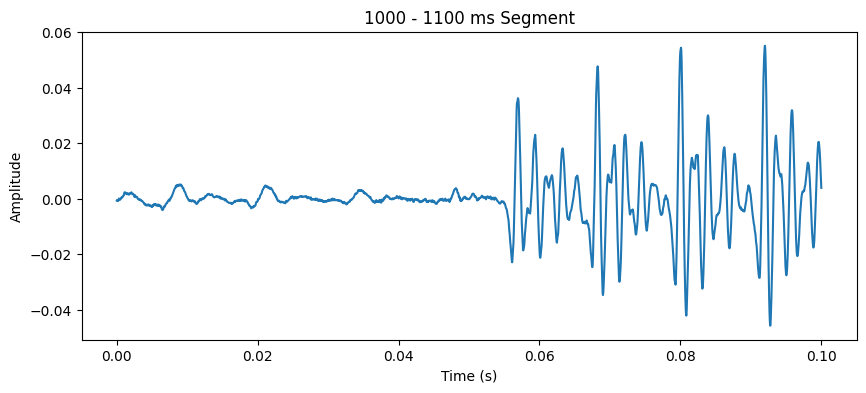

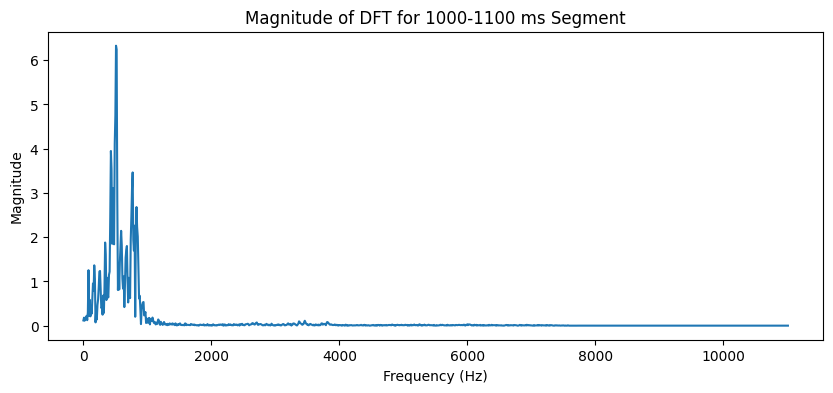

In [22]:
process_segments(audio_data_2, fs_2, 100)

#### e) How does the spectrum of these signals differ from that of sum of sinusoids? 

In [ ]:
"""
They display way more frequencies than the sum of sinusoids wave, specially the audio2.wav siganal which is a human voice.
These aditional frequencies make the sound more complex and realistic.
As the audios are more complex they are also more difficult to analyze,
for example, the audio change drastically as a function of time, so if one tries to plot it in the first 100ms instead of in a further interval,
it displays a flat line with no information.

As an interesting point, it can be seen that the resolution of the plots for the audio1 and audio2 are way better than the sum of sinusoids,
even though these audios are much more complex.
This highlights the effectiveness of the sounddivice library in processing the audio signals, so I will most likely use it in future projects.

"""

### Bonus problem:

In [ ]:
#Not done